In [63]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
class Contingency:
    def __init__(self, table):
        self.table = table
        self.row_sum = table.sum(axis = 1)
        self.col_sum = table.sum(axis = 0)
        
        self.tot = table.sum()
        
    def standard_score(self, row_score, col_score):
        row_score = np.array(row_score); col_score = np.array(col_score),
        rmean = (self.row_sum * row_score).sum()/self.tot
        rsdv = ((((row_score - rmean)**2)*self.row_sum).sum()/(self.tot-1))**.5

        cmean = (self.col_sum * col_score).sum()/self.tot
        csdv = ((((col_score - cmean)**2)*self.col_sum).sum()/(self.tot-1))**.5
        
        srow = (row_score-rmean)/rsdv ; scol = (col_score-cmean)/csdv

        return srow, scol
    
    def Pcorr(self, row_score, col_score):
        srow, scol = self.standard_score(row_score, col_score)
        srow = srow.reshape(1,-1); scol = scol.reshape(-1, 1)
        r = srow.dot(self.table).dot(scol)/self.tot
        
        return r[0, 0]

    def M2test(self, row_score, col_score):
        # Under H_0 : corr = 0
        
        r = self.Pcorr(row_score, col_score)
        M2 = (self.tot-1)*r**2
        pval = chi2.sf(M2, 1)
        
        return M2, pval
        
    def chi2test(self):
        # Under H_0 : independence 
        
        rp = (self.row_sum/self.tot).reshape(-1, 1)
        cp = (self.col_sum/self.tot).reshape(1, -1)
        
        estim = rp.dot(cp)*self.tot
        x2 = ((table-estim)**2/estim).sum()
        
        df = (self.table.shape[0]-1)*(self.table.shape[1]-1)
        pval = chi2.sf(x2, df)
        
        return x2, pval
    
    def PearsonResidual(self):
        mu_hat = self.row_sum.reshape(-1, 1).dot(self.col_sum.reshape(1, -1))/self.tot
        z = (self.table-mu_hat)/np.sqrt(mu_hat)
        print("standard residual : \n", z.round(2))
        return z
    
    def StandardizedResidual(self):
        mu_hat = self.row_sum.reshape(-1, 1).dot(self.col_sum.reshape(1, -1))/self.tot
        prow = 1-self.row_sum/self.tot; pcol = 1-self.col_sum/self.tot
        print("pi+ :", prow)
        print("p+j :", pcol)
        print("muhat :", mu_hat)
        norm = np.apply_along_axis(lambda x : x*prow, 0, mu_hat)
        norm = np.apply_along_axis(lambda x : x*pcol.T, 1, norm)
        print("norm :", norm)
        z = (self.table-mu_hat)/np.sqrt(norm)
        print("standard residual : \n", z.round(2))
        return z
      

# 3.4.2 Example : Is Happiness Associated with Political Ideology?

In [48]:
table = np.array([[13, 29, 15],
                [23, 59, 47],
                 [14, 67, 54]])
cont = Contingency(table)
r = cont.Pcorr(row_score = [1, 2, 3], col_score = [1, 2, 3])
x2, pval = cont.chi2test()
print("Chi-squared test x2 is %.2f and p-value is %.2f" %(x2, pval))
print("Pearson Correlation r is %.3f" %r)
m2, pval = cont.M2test(row_score=[1,2,3], col_score = [1, 2, 3])
print("M square test m2 is %.2f and p-value is %.2f" %(m2, pval) )

Chi-squared test x2 is 7.07 and p-value is 0.13
Pearson Correlation r is 0.135
M square test m2 is 5.82 and p-value is 0.02


# 3.4.6 Example : Infant Birth Defects by Maternal Alcohol Consumption

In [49]:
table = np.array([[17066, 14464, 788, 126, 37],
                [48, 38, 5, 1, 1]])
cont = Contingency(table)
r = cont.Pcorr(row_score = [1, 2], col_score = [0, 0.5, 1.5, 4, 7])
x2, pval = cont.chi2test()
print("Chi-squared test x2 is %.2f and p-value is %.2f" %(x2, pval))
print("Pearson Correlation r is %.3f" %r)
m2, pval = cont.M2test(row_score = [1, 2], col_score = [0, 0.5, 1.5, 4, 7])
print("M square test m2 is %.2f and p-value is %.3f" %(m2, pval) )

Chi-squared test x2 is 12.08 and p-value is 0.02
Pearson Correlation r is 0.014
M square test m2 is 6.57 and p-value is 0.010


In [50]:
r = cont.Pcorr(row_score = [1, 2], col_score = [1, 2, 3, 4, 5])
x2, pval = cont.chi2test()
print("Chi-squared test x2 is %.2f and p-value is %.2f" %(x2, pval))
print("Pearson Correlation r is %.3f" %r)
m2, pval = cont.M2test(row_score = [1, 2], col_score = [1, 2, 3, 4, 5])
print("M square test m2 is %.2f and p-value is %.3f" %(m2, pval) )

Chi-squared test x2 is 12.08 and p-value is 0.02
Pearson Correlation r is 0.007
M square test m2 is 1.83 and p-value is 0.176


# Exercise 3.6

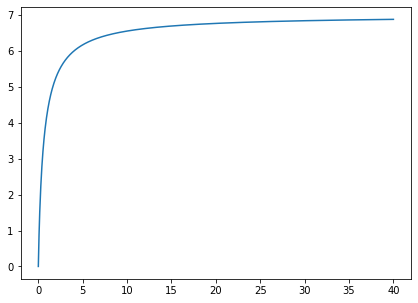

In [51]:
# theta에 대한 n의 변화 추이 -> 1-1함수이다.
x = np.linspace(0, 40, 1000)
plt.figure(figsize = (7,5))
plt.plot(x, -4 + np.sqrt((121*x+16)/(x+1)))
#plt.axhline(y=0.05, color='r', linestyle='--', linewidth=1)
plt.show()

/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


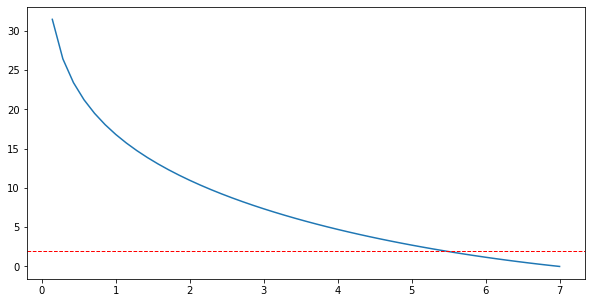

In [52]:
#n에 따라 G^2값 변화추이 -> Monotone decreasing
n = np.linspace(0, 7, 50)
plt.figure(figsize=(10, 5))
plt.plot(n, 7*np.log(7/n)+8*np.log(8/(15-n))+15*np.log(15/(8+n)))
plt.axhline(y=1.9205, color='r', linestyle='--', linewidth=1)
plt.show()

In [53]:
def f(x) : 
    # 위의 플랏에 의해 우리가 구하려는 것은 n : f(n) > 0
    return 7*log(x)+8*log(15-x)+15*log(8+x)-68.975
def df(x):
    return 7/x-8/(15-x)+15/(8+x)

def g(x) :
    return x*(x+8)/((7-x)*(x+15))

def Newton_Raphson(f, df, a, b, tol=1e-9):
    from numpy import sign
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    x = 0.5*(a + b)
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
        # Tighten the brackets on the root
        if sign(fa) != sign(fx): b = x
        else: a = x
            
        # Try a Newton-Raphson step 
        dfx = df(x)
        # If division by zero, push x out of bounds 
        try: dx = -fx/dfx
        except ZeroDivisionError: dx = b - a
        x = x + dx
        # If the result is outside the brackets, use bisection
        if (b - x)*(x - a) < 0.0:
            dx = 0.5*(b - a)
            x = a + dx
      # Check for convergence
    if abs(dx) < tol*max(abs(b),1.0): return x 
    print('Too many iterations in Newton-Raphson')

In [54]:
sol = Newton_Raphson(f, df, 4, 6)
print("해가 맞는지 확인 : f(sol) = %.2f" %f(sol))
print("confidence interval : n > %.2f" %sol)
print("구하려는 theta의 CI : theta > %.2f" %g(sol))

해가 맞는지 확인 : f(sol) = 0.00
confidence interval : n > 5.49
구하려는 theta의 CI : theta > 2.40


# Exercise 3.9

In [91]:
table = np.array([[301, 359, 213],
                [212, 390, 362],
                 [8, 44, 48]])
cont = Contingency(table)
x2, pval = cont.chi2test()
print("Chi-squared test x2 is %.2f and p-value is %.2f" %(x2, pval))
z = cont.StandardizedResidual()

Chi-squared test x2 is 73.71 and p-value is 0.00
standard residual : 
 [[ 6.82  0.16 -5.04]
 [-4.63 -0.43  3.68]
 [-5.75  0.88  3.48]]


# Exercise 3.12

In [115]:
table = np.array([[422, 381, 273],
                [299, 365, 232]])
cont = Contingency(table)
x2, pval = cont.chi2test()
print("Chi-squared test x2 is %.2f and p-value is %.2f" %(x2, pval))
z = cont.StandardizedResidual()

Chi-squared test x2 is 8.29 and p-value is 0.02
pi+ : [0.45436105 0.54563895]
p+j : [0.63438134 0.62170385 0.74391481]
muhat : [[393.40567951 407.04665314 275.54766734]
 [327.59432049 338.95334686 229.45233266]]
norm : [[113.39453478 114.98173215  93.13674184]
 [113.39453478 114.98173215  93.13674184]]
standard residual : 
 [[ 2.69 -2.43 -0.26]
 [-2.69  2.43  0.26]]


# Exercise 3.15

In [119]:
table = np.array([[2, 4, 13, 3],
                [2, 6, 22, 4],
                 [0, 1, 15, 8],
                 [0, 3, 13, 8]])
cont = Contingency(table)
x2, pval = cont.chi2test()
print("Chi-squared test x2 is %.2f and p-value is %.2f" %(x2, pval))
m2, pval = cont.M2test(row_score = [3, 10, 20, 35], col_score = [1, 3, 4, 5])
print("M square test m2 is %.2f and p-value is %.3f" %(m2, pval) )

Chi-squared test x2 is 11.52 and p-value is 0.24
M square test m2 is 6.91 and p-value is 0.009
